# Promotional Campaign Analysis

### Goal: Analyze effectiveness of a promotional campaign in increasing ridership

Will analyze the impact of an experiement in which a group of users were provided with a 30% dicsount code to a rideshare service compared to a control group who recieved no promotional content.

#### Assumtions:
- Control and discount groups have unequal sample size
- Data is normally distributed 
- For simplicity, analysis metrics have been normalized per rider using the total number of riders in a group regardless of ride completion
- A standard 0.05 significance level is appropriate for analysis 
- Success for this experiment is defined as increased revenue and increased ridership reflected by ROI  




### Import Data and Packages

In [2]:
import pandas as pd 
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene

### Data Formatting

In [5]:
#Subsetting the data into two dataframes, one for control group and one for discount group
#This should make analysis easier
control = data[data['VARIANT_NAME'] == 'Control']
control.reset_index(inplace = True)

discount = data[data['VARIANT_NAME'] == 'Discount Group']
discount.reset_index(inplace = True)

# Create new column RIDE_DATE to later group by date
control.loc[:,['RIDE_DATE']] = pd.to_datetime(control['RIDE_DATETIME']).dt.date
discount.loc[:,['RIDE_DATE']] = pd.to_datetime(discount['RIDE_DATETIME']).dt.date

/Users/annikakao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Proportion Testing - Proportion of riders that completed at least one ride


Null Hypothesis: The proportion of discount group riders that completed at least one ride is equal to the proportion of control group riders.

Alternative Hypothesis: The proportion of riders that completed at least one ride is different in the control and discount groups.

### Looking at whole dataset

In [4]:
# Find count of riders in each group
controlSize = control["RIDER_ID"].nunique()
discountSize = discount["RIDER_ID"].nunique()

# Find the distinct count of riders that have completed at leasrt one ride by dropping rows that contain NaN values
compC = control.dropna(axis = 0)
controlC = compC["RIDER_ID"].nunique()

compD = discount.dropna(axis = 0)
discountC = compD["RIDER_ID"].nunique()


print("There are", controlSize, "riders in the control group \n",controlC, 
      "completed at least one ride \n %0.2f" % ((controlC/controlSize)*100), 
      "% of control riders competed at least one ride.")
print("There are", discountSize, "riders in the discount group \n", discountC, 
      "completed at least one ride \n %0.2f" % ((discountC/discountSize)*100), 
      "% of discount riders competed at least one ride.")

There are 1029 riders in the control group 
 823 completed at least one ride 
 79.98 % of control riders competed at least one ride.
There are 9301 riders in the discount group 
 7644 completed at least one ride 
 82.18 % of discount riders competed at least one ride.


In [5]:
# Significance level for comparison against p-value
significance = 0.05

# Check our sample against Ho for Ha != Ho
completed = np.array([controlC, discountC])
samples = np.array([controlSize, discountSize])

# Perform proportion test
stat, p_value = proportions_ztest(count=completed, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.10f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference in porportion of riders that completed at least one ride is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference in proportion is statistically significant")

z_stat: -1.745, p_value: 0.0809871641
Fail to reject the null hypothesis: 
 the difference in porportion of riders that completed at least one ride is not statistically significant


### Looking at campaign period

In [6]:
# Significance level for comparison against p-value
significance = 0.05

# Find count of riders in each group
countSize = control["RIDER_ID"].nunique()
discountSize = discount["RIDER_ID"].nunique()

# Find the distinct count of riders that have completed at leasrt one ride
compC = control.dropna(axis = 0)
compCP = compC[compC["RIDE_DATETIME"] <= '12/2/2019']
controlC = compCP["RIDER_ID"].nunique()

compD = discount.dropna(axis = 0)
compDP = compD[compD["RIDE_DATETIME"] <= '12/2/2019']
discountC = compDP["RIDER_ID"].nunique()

print("During the campaign: \nThere are", controlSize, "riders in the control group \n",controlC, 
      "completed at least one ride \n %0.2f" % ((controlC/controlSize)*100), 
      "% of control riders competed at least one ride.")
print("There are", discountSize, "riders in the discount group \n", discountC, 
      "completed at least one ride \n %0.2f" % ((discountC/discountSize)*100), 
      "% of discount riders competed at least one ride.")

During the campaign: 
There are 1029 riders in the control group 
 679 completed at least one ride 
 65.99 % of control riders competed at least one ride.
There are 9301 riders in the discount group 
 6701 completed at least one ride 
 72.05 % of discount riders competed at least one ride.


In [7]:
# Significance level for comparison against p-value
significance = 0.05

# check our sample against Ho for Ha != Ho
completed = np.array([controlC, discountC])
samples = np.array([controlSize, discountSize])

# Perform proportion test
stat, p_value = proportions_ztest(count=completed, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.10f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis \n - the difference in porportion of riders that completed at least one ride is not statistically significant")
else:
   print ("Reject the null hypothesis \n - suggest the alternative hypothesis is true and the difference in proportion is statistically significant")


z_stat: -4.083, p_value: 0.0000443688
Reject the null hypothesis 
 - suggest the alternative hypothesis is true and the difference in proportion is statistically significant


### Looking at after the campaign

In [8]:
# Find count of riders in each group
countSize = control["RIDER_ID"].nunique()
discountSize = discount["RIDER_ID"].nunique()

# Find the distinct count of riders that have completed at leasrt one ride
compC = control.dropna(axis = 0)
compCP = compC[compC["RIDE_DATETIME"] > '12/2/2019']
controlC = compCP["RIDER_ID"].nunique()

compD = discount.dropna(axis = 0)
compDP = compD[compD["RIDE_DATETIME"] > '12/2/2019']
discountC = compDP["RIDER_ID"].nunique()

print("After the campaign ended: \nThere are", controlSize, "riders in the control group \n",controlC, 
      "completed at least one ride \n %0.2f" % ((controlC/controlSize)*100), 
      "% of control riders competed at least one ride.")
print("There are", discountSize, "riders in the discount group \n", discountC, 
      "completed at least one ride \n %0.2f" % ((discountC/discountSize)*100), 
      "% of discount riders competed at least one ride.")

After the campaign ended: 
There are 1029 riders in the control group 
 719 completed at least one ride 
 69.87 % of control riders competed at least one ride.
There are 9301 riders in the discount group 
 6639 completed at least one ride 
 71.38 % of discount riders competed at least one ride.


In [9]:
# Significance level for comparison against p-value
significance = 0.05

# check our sample against Ho for Ha != Ho
completed = np.array([controlC, discountC])
samples = np.array([controlSize, discountSize])

# Perform proportion test
stat, p_value = proportions_ztest(count=completed, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.10f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference in porportion of riders that completed at least one ride is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference in proportion is statistically significant")


z_stat: -1.012, p_value: 0.3113230337
Fail to reject the null hypothesis: 
 the difference in porportion of riders that completed at least one ride is not statistically significant


## Analysis of Average Spent by Rider 

Hypothesis: The average amount paid per rider is the same between the control and discount group

Alternative: The average amount paid per rider is different between the control and discount group

### Looking at whole dataset

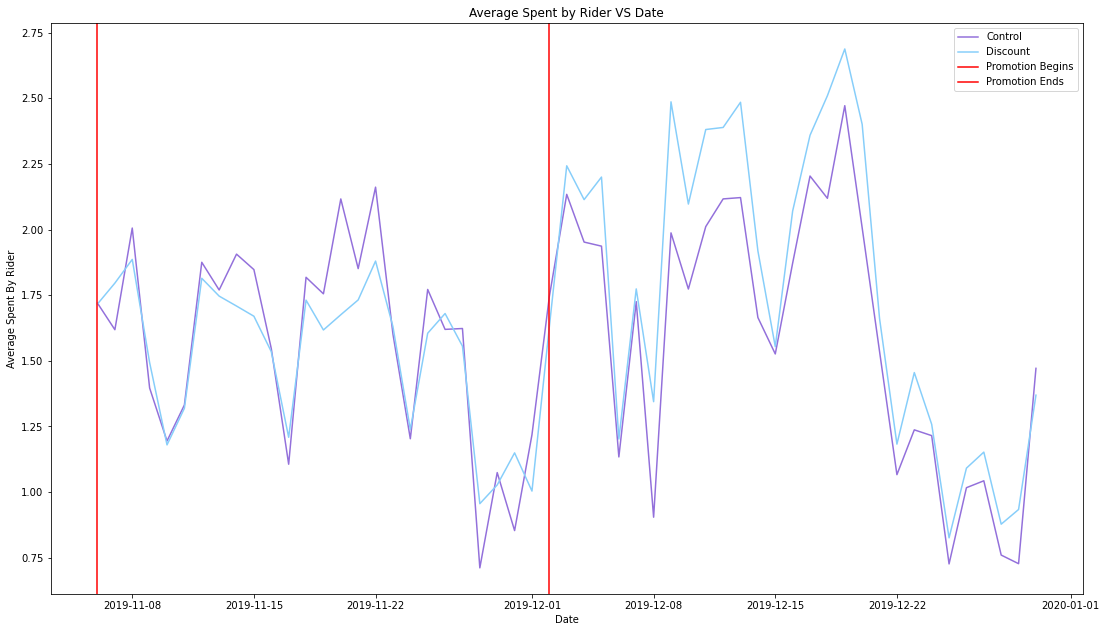

In [10]:
# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID and find the average a rider spends
controlGB = control.groupby(['RIDE_DATE']).agg({"FINAL_AMOUNT_PAID": 'sum'})
controlGB["AVG Spent By Rider"] = (controlGB["FINAL_AMOUNT_PAID"])/100 / control['RIDER_ID'].nunique()
controlGB.reset_index(inplace = True)

discountGB = discount.groupby(['RIDE_DATE']).agg({"FINAL_AMOUNT_PAID": 'sum'})
discountGB["AVG Spent By Rider"] = (discountGB["FINAL_AMOUNT_PAID"])/100 / discount['RIDER_ID'].nunique()
discountGB.reset_index(inplace = True)

# Plot the graph 
plt.plot(controlGB['RIDE_DATE'], controlGB['AVG Spent By Rider'], label = 'Control', color = "mediumpurple")
plt.plot(discountGB['RIDE_DATE'], discountGB['AVG Spent By Rider'], label = 'Discount', color = "lightskyblue")
plt.axvline(x = pd.to_datetime('11/6/2019'),label = 'Promotion Begins', color = 'red')
plt.axvline(x = pd.to_datetime('12/2/2019'),label = 'Promotion Ends', color = 'red')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Spent By Rider")
plt.title("Average Spent by Rider VS Date")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)


In [11]:
# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID to get revenue by rider
controlGB = control.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum'})
discountGB = discount.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum'})

spendC = (control["FINAL_AMOUNT_PAID"].sum()/100)/ control["RIDER_ID"].nunique()
spendD = (discount["FINAL_AMOUNT_PAID"].sum()/100)/ discount["RIDER_ID"].nunique()

print("The average spend per rider for the control group is $%0.2f \nThe average spend per rider for the discount group is $%0.2f" % (spendC, spendD))


# Test for equal variance
stat, p = levene(controlGB["FINAL_AMOUNT_PAID"], discountGB["FINAL_AMOUNT_PAID"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")


# Perform T test
result = stats.ttest_ind(controlGB["FINAL_AMOUNT_PAID"], discountGB["FINAL_AMOUNT_PAID"], equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: /n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")



The average spend per rider for the control group is $86.91 
The average spend per rider for the discount group is $91.21
Variances are equal
Ttest_indResult(statistic=-1.0899231234947269, pvalue=0.2757724385280225)
Fail to reject the null hypothesis: 
 the difference between the averages is not statistically significant


### Looking at campaign period

In [12]:
# Subset data and set FINAL_AMOUNT_PAID to 0 if ride was completed after promotion
# I did not exclude the rows outsidde of the campaign period beccause we want the average based on total riders
revenueCP = control[['RIDER_ID', 'RIDE_DATETIME', 'FINAL_AMOUNT_PAID']]
resultCP = []
for i in range(len(revenueCP)):
    if revenueCP["RIDE_DATETIME"][i] > pd.to_datetime('12/2/2019'):
        resultCP.append(0)
    else:
        resultCP.append(revenueCP['FINAL_AMOUNT_PAID'][i])
revenueCP.loc[:,['DURING']] = resultCP

# Repeat for discount group
revenueDP = discount[['RIDER_ID', 'RIDE_DATETIME', 'FINAL_AMOUNT_PAID']]

resultDP = []
for i in range(len(revenueDP)):
    if revenueDP["RIDE_DATETIME"][i] > pd.to_datetime('12/2/2019'):
        resultDP.append(0)
    else:
        resultDP.append(revenueDP['FINAL_AMOUNT_PAID'][i])
revenueDP.loc[:,['DURING']] = resultDP

# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID and DURING to get revenue by rider
controlRP = revenueCP.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum', "DURING": 'sum'})
discountRP = revenueDP.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum', "DURING": 'sum'})

spendC = (revenueCP["DURING"].sum()/100)/ control["RIDER_ID"].nunique()
spendD = (revenueDP["DURING"].sum()/100)/ discount["RIDER_ID"].nunique()

print("The average spend per rider for the control group during the campaign is $%0.2f \nThe average spend per rider for the discount group during the campaign is $%0.2f" % (spendC, spendD))



/Users/annikakao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


The average spend per rider for the control group during the campaign is $40.70 
The average spend per rider for the discount group during the campaign is $39.56


In [13]:
# Testing for equal variance
stat, p = levene(controlRP["DURING"], discountRP["DURING"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")

# Perform T test
result = stats.ttest_ind(controlRP["DURING"], discountRP["DURING"], equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")


Variances are equal
Ttest_indResult(statistic=0.6295310016988349, pvalue=0.5290154042585985)
Fail to reject the null hypothesis: 
 the difference between the averages is not statistically significant


### Looking at after campaign 

In [14]:
# Create new variable for the sums of amount paid 
revenueC = control[['RIDER_ID', 'RIDE_DATETIME', 'FINAL_AMOUNT_PAID']]
resultC = []
for i in range(len(revenueC)):
    if revenueC["RIDE_DATETIME"][i] <= pd.to_datetime('12/2/2019'):
        resultC.append(0)
    else:
        resultC.append(revenueCP['FINAL_AMOUNT_PAID'][i])
revenueC.loc[:,['DURING']] = resultC

revenueD = discount[['RIDER_ID', 'RIDE_DATETIME', 'FINAL_AMOUNT_PAID']]
resultD = []
for i in range(len(revenueD)):
    if revenueD["RIDE_DATETIME"][i] <= pd.to_datetime('12/2/2019'):
        resultD.append(0)
    else:
        resultD.append(revenueDP['FINAL_AMOUNT_PAID'][i])
revenueD.loc[:,['DURING']] = resultD

controlR = revenueC.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum', "DURING": 'sum'})
discountR = revenueD.groupby(['RIDER_ID']).agg({"FINAL_AMOUNT_PAID": 'sum', "DURING": 'sum'})

spendC = (revenueC["DURING"].sum()/100)/ control["RIDER_ID"].nunique()
spendD = (revenueD["DURING"].sum()/100)/ discount["RIDER_ID"].nunique()

print("The average spend per rider for the control group after the campaign is $%0.2f \nThe average spend per rider for the discount group after the campaign is $%0.2f" % (spendC, spendD))



The average spend per rider for the control group after the campaign is $46.21 
The average spend per rider for the discount group after the campaign is $51.66


In [15]:
# Testing for equal variance
stat, p = levene(controlR["DURING"], discountR["DURING"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")

# Perform T test
result = stats.ttest_ind(controlR["DURING"], discountR["DURING"], equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")


Variances are different
Ttest_indResult(statistic=-2.264439155647374, pvalue=0.023567758166318842)
Reject the null hypothesis: 
 suggest the alternative hypothesis is true and the difference between the averages is statistically significant


## Analysis of Average Cost of a Trip

Null Hypothesis: The average cost of a trip is the same between the control and discount group

Alternative Hypothesis: The average cost of a trip is different between the control and discount group

### Looking at whole dataset

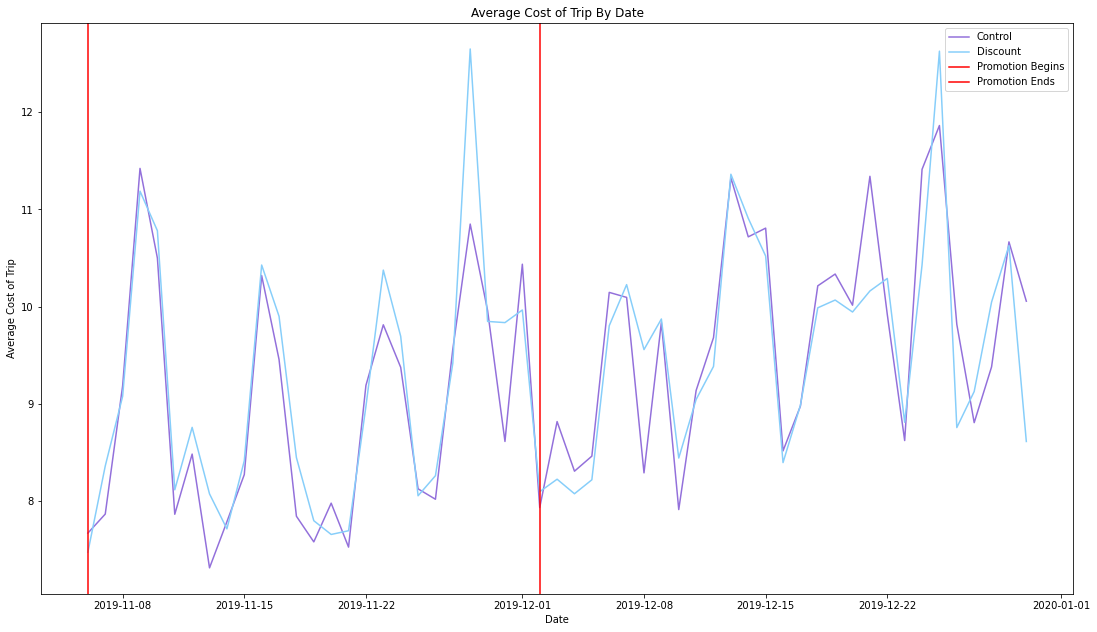

In [16]:
# Groupby RIDE_ID and sum LIST_PRICE to find average cost of trip
controlGB = control.groupby(['RIDE_DATE']).agg({"LIST_PRICE": 'sum', 'RIDE_ID': 'count'})
controlGB["AVG Cost Of Ride"] = (controlGB["LIST_PRICE"])/100 / controlGB['RIDE_ID']
controlGB.reset_index(inplace = True)

discountGB = discount.groupby(['RIDE_DATE']).agg({"LIST_PRICE": 'sum', 'RIDE_ID': 'count'})
discountGB["AVG Cost Of Ride"] = (discountGB["LIST_PRICE"])/ 100 / discountGB['RIDE_ID']
discountGB.reset_index(inplace = True)

# Plot
plt.plot(controlGB['RIDE_DATE'], controlGB['AVG Cost Of Ride'], label = 'Control', color = "mediumpurple")
plt.plot(discountGB['RIDE_DATE'], discountGB['AVG Cost Of Ride'], label = 'Discount', color = "lightskyblue")
plt.axvline(x = pd.to_datetime('11/6/2019'),label = 'Promotion Begins', color = 'red')
plt.axvline(x = pd.to_datetime('12/2/2019'),label = 'Promotion Ends', color = 'red')

plt.xlabel("Date")
plt.ylabel("Average Cost of Trip")
plt.title("Average Cost of Trip By Date")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)


In [17]:
costC = (control["LIST_PRICE"].sum()/100)/ control["RIDE_ID"].nunique()
costD = (discount["LIST_PRICE"].sum()/100)/ discount["RIDE_ID"].nunique()

print("The average trip cost for the control group during the campaign is $%0.2f \nThe average trip cost for the discount group during the campaign is $%0.2f" % (costC, costD))


print("Analysis Results:")

# Test for equal variance
stat, p = levene(control["LIST_PRICE"].dropna(), discount["LIST_PRICE"].dropna())
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")


# Perform T test
result = stats.ttest_ind(control["LIST_PRICE"].dropna(), discount["LIST_PRICE"].dropna(), equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")


The average trip cost for the control group during the campaign is $9.08 
The average trip cost for the discount group during the campaign is $9.10
Analysis Results:
Variances are equal
Ttest_indResult(statistic=-0.25125161805719987, pvalue=0.8016200031658681)
Fail to reject the null hypothesis: 
 the difference between the averages is not statistically significant


### Looking at data during campaign

In [18]:
# Subset dataframe to only include rides during campaign
controlP = control[control["RIDE_DATETIME"] <= pd.to_datetime('12/2/2019')]
discountP = discount[discount["RIDE_DATETIME"] <= pd.to_datetime('12/2/2019')]

costC = (controlP["LIST_PRICE"].sum()/100)/ controlP["RIDE_ID"].nunique()
costD = (discountP["LIST_PRICE"].sum()/100)/ discountP["RIDE_ID"].nunique()

print("The average trip cost for the control group during the campaign is $%0.2f \nThe average trip cost for the discount group during the campaign is $%0.2f" % (costC, costD))


print("Analysis Results:")

# Test for equal variance
stat, p = levene(controlP["LIST_PRICE"].dropna(), discountP["LIST_PRICE"].dropna())
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")


# Perform T test
result = stats.ttest_ind(controlP["LIST_PRICE"].dropna(), discountP["LIST_PRICE"].dropna(), equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")


The average trip cost for the control group during the campaign is $8.60 
The average trip cost for the discount group during the campaign is $8.80
Analysis Results:
Variances are equal
Ttest_indResult(statistic=-2.4313907419426886, pvalue=0.015043809313942535)
Reject the null hypothesis: 
 suggest the alternative hypothesis is true and the difference between the averages is statistically significant


### Looking at data after campaign

In [19]:
# Subset dataframe to only include rides after campaign
controlP = control[control["RIDE_DATETIME"] > pd.to_datetime('12/2/2019')]
discountP = discount[discount["RIDE_DATETIME"] > pd.to_datetime('12/2/2019')]

costC = (controlP["LIST_PRICE"].sum()/100)/ controlP["RIDE_ID"].nunique()
costD = (discountP["LIST_PRICE"].sum()/100)/ discountP["RIDE_ID"].nunique()

print("The average trip cost for the control group during the campaign is $%0.2f \nThe average trip cost for the discount group during the campaign is $%0.2f" % (costC, costD))



print("Analysis Results:")

# Test for equal variance
stat, p = levene(controlP["LIST_PRICE"].dropna(), discountP["LIST_PRICE"].dropna())
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")


# Perform T test
result = stats.ttest_ind(controlP["LIST_PRICE"].dropna(), discountP["LIST_PRICE"].dropna(), equal_var=True)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")


The average trip cost for the control group during the campaign is $9.53 
The average trip cost for the discount group during the campaign is $9.41
Analysis Results:
Variances are equal
Ttest_indResult(statistic=1.3772722478292077, pvalue=0.16843323945404873)
Fail to reject the null hypothesis: 
 the difference between the averages is not statistically significant


## Analysis of Average Number of Rides Completed Per Rider

Null Hypothesis: The average number of rides per rider is the same between the control and discount group

Alternative Hypothesis: The average number of riders per rider is different between the control and discount group


### Looking at whole dataset

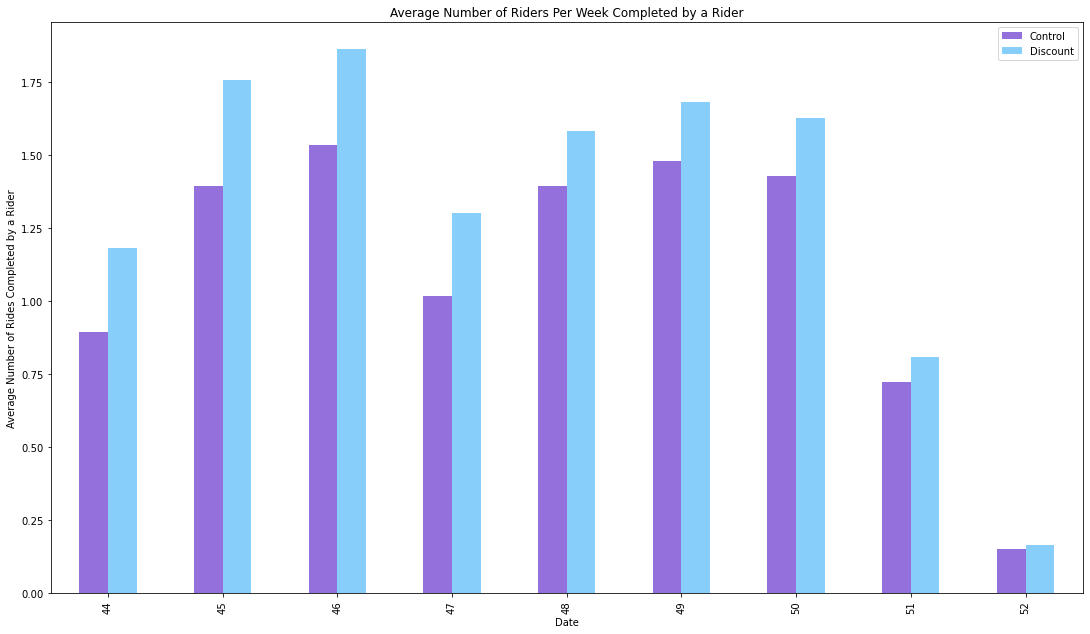

In [20]:
# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID to get revenue by rider
controlGB = control.groupby(['RIDE_DATE']).agg({"RIDE_ID": 'count'})
controlGB["Control"] = (controlGB["RIDE_ID"]) / control['RIDER_ID'].nunique()
controlGB.reset_index(inplace = True)

discountGB = discount.groupby(['RIDE_DATE']).agg({"RIDE_ID": 'count'})
discountGB["Discount"] = (discountGB["RIDE_ID"]) / discount['RIDER_ID'].nunique()
discountGB.reset_index(inplace = True)

# Drop unsed column and join dataframes
avgRidesC = controlGB.drop("RIDE_ID", axis = 1)
avgRidesD = discountGB.drop("RIDE_ID", axis = 1)
avgRides = avgRidesC.join(avgRidesD.set_index('RIDE_DATE'), on = 'RIDE_DATE')

# Group by week to get average number of rides competed by a rider by week
avgRidesW = avgRides.groupby((pd.to_datetime(avgRides['RIDE_DATE'])).dt.strftime('%W')).sum()
avgRidesW.reset_index(inplace = True)
avgRidesW.plot(x="RIDE_DATE", y=["Control", "Discount"], kind="bar", color = ['mediumpurple', 'lightskyblue'], 
              title = "Average Number of Riders Per Week Completed by a Rider", 
               xlabel = "Date", ylabel = "Average Number of Rides Completed by a Rider")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

In [21]:
# Groupby RIDER_ID and count RIDER_ID to get revenue by rider
controlGB = control.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})
discountGB = discount.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})

ridesC = controlGB["RIDE_ID"].mean()
ridesD = discountGB["RIDE_ID"].mean()

print("The average number of rides per rider for the control group is %0.2f \nThe average number of rides per rider for the discount group is %0.2f" % (ridesC, ridesD))


# Test for equal variance
stat, p = levene(controlGB["RIDE_ID"], discountGB["RIDE_ID"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")


# Perform Welch Test (unequal variance T test)
result = stats.ttest_ind(controlGB["RIDE_ID"], discountGB["RIDE_ID"], equal_var=False)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")



The average number of rides per rider for the control group is 10.01 
The average number of rides per rider for the discount group is 11.97
Variances are different
Ttest_indResult(statistic=-4.218137165012049, pvalue=2.6295105188644712e-05)
Reject the null hypothesis: 
 suggest the alternative hypothesis is true and the difference between the averages is statistically significant


## Looking at data during campaign

In [22]:
# Subset data and set RIDE_ID to NaN if ride was completed after promotion period
ridesC = control[['RIDER_ID', 'RIDE_DATETIME', 'RIDE_ID']]
for i in range(len(ridesC)):
    if ridesC.loc[i,"RIDE_DATETIME"] > pd.Timestamp('12/2/2019'):
        ridesC.loc[i,['RIDE_ID']] = np.nan

ridesD = discount[['RIDER_ID', 'RIDE_DATETIME', 'RIDE_ID']]
for i in range(len(ridesD)):
    if ridesD.loc[i,"RIDE_DATETIME"] > pd.Timestamp('12/2/2019'):
        ridesD.loc[i,['RIDE_ID']] = np.nan
        
        
# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID to get revenue by rider
controlGBP = ridesC.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})
discountGBP = ridesD.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})

ridesCP = controlGBP["RIDE_ID"].mean()
ridesDP = discountGBP["RIDE_ID"].mean()

print("The average number of rides per rider for the control group during the campaign is %0.2f \nThe average number of rides per rider for the discount group during the campaign is %0.2f" % (ridesCP, ridesDP))


/Users/annikakao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


The average number of rides per rider for the control group during the campaign is 4.84 
The average number of rides per rider for the discount group during the campaign is 6.10


In [23]:
# Test for equal variance
stat, p = levene(controlGB["RIDE_ID"], discountGB["RIDE_ID"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")

# Perform Welch Test (unequal variance T test)
result = stats.ttest_ind(controlGBP["RIDE_ID"], discountGBP["RIDE_ID"], equal_var=False)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")



Variances are different
Ttest_indResult(statistic=-5.405707113309415, pvalue=7.612653733182752e-08)
Reject the null hypothesis: 
 suggest the alternative hypothesis is true and the difference between the averages is statistically significant


## Looking at data after the campaign

In [24]:
# Subset data and set RIDE_ID to NaN if ride was completed during promotion period
revenueC = control[['RIDER_ID', 'RIDE_DATETIME', 'RIDE_ID']]
for i in range(len(revenueC)):
    if revenueC.loc[i,"RIDE_DATETIME"] <= pd.Timestamp('12/2/2019'):
        revenueC.loc[i,['RIDE_ID']] = np.nan

revenueD = discount[['RIDER_ID', 'RIDE_DATETIME', 'RIDE_ID']]
for i in range(len(revenueD)):
    if revenueD.loc[i,"RIDE_DATETIME"] <= pd.Timestamp('12/2/2019'):
        revenueD.loc[i,['RIDE_ID']] = np.nan
        
        
# Groupby RIDER_ID and sum FINAL_AMOUNT_PAID to get revenue by rider
controlGB = revenueC.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})
discountGB = revenueD.groupby(['RIDER_ID']).agg({"RIDE_ID": 'count'})

ridesCP = controlGB["RIDE_ID"].mean()
ridesDP = discountGB["RIDE_ID"].mean()

print("The average number of rides per rider for the control group after the campaign is %0.2f \nThe average number of rides per rider for the discount group after the campaign is %0.2f" % (ridesCP, ridesDP))


The average number of rides per rider for the control group after the campaign is 5.17 
The average number of rides per rider for the discount group after the campaign is 5.87


In [25]:
# Test for equal variance
stat, p = levene(controlGB["RIDE_ID"], discountGB["RIDE_ID"])
if p > significance:
   print ("Variances are equal")
else:
   print ("Variances are different")

# Perform Welch Test (unequal variance T test)
result = stats.ttest_ind(controlGB["RIDE_ID"], discountGB["RIDE_ID"], equal_var=False)
print(result)

p_value = result[1]
if p_value > significance:
   print ("Fail to reject the null hypothesis: \n the difference between the averages is not statistically significant")
else:
   print ("Reject the null hypothesis: \n suggest the alternative hypothesis is true and the difference between the averages is statistically significant")



Variances are different
Ttest_indResult(statistic=-2.6662582800736714, pvalue=0.0077649153790774385)
Reject the null hypothesis: 
 suggest the alternative hypothesis is true and the difference between the averages is statistically significant


## Return on Investment (ROI)

Upon inspection of the data, I found three confounding factors:
1. The Control group received various discounts outside of the promotional campaign 
2. The Discount group received various discounts in addition to those they received as part of the promotional campaign
3. Some rides had applied discounts that were not equal to the promotional discount of 30% 

Assumptions used to calculate ROI:
1. The variable "FINAL AMOUNT PAID" accounts for the any discount applied to each ride and is equal to the total amount Via collected from each ride. Therefore, sales = "FINAL AMOUNT PAID"
2. Not all discounts given to discount group can be attributed to the promotional campaign. For the purposes of ROI, investment = 30% of the “LIST PRICE” for all rides completed by the discount group during the promotional period
3. Discounts used by both Control and Discount group rider which were not part of the promotional campaign are randomized across both groups and therefore their effect on ROI is negligible
4. There are an uneven number of riders in the Control and Discount group therefore metrics are normalized by riders for each group 


### ROI for whole dataset

In [26]:
controlDP = control[control["RIDE_DATETIME"] <= pd.Timestamp('12/2/2019')]
discountDP = discount[discount["RIDE_DATETIME"] <= pd.Timestamp('12/2/2019')]

totalDiscount = ((discountDP['LIST_PRICE'].sum()) * 0.3) / discount["RIDER_ID"].nunique()
discountRevenue = (discount['FINAL_AMOUNT_PAID'].sum()) / discount["RIDER_ID"].nunique()
controlRevenue = (control['FINAL_AMOUNT_PAID'].sum()) / control["RIDER_ID"].nunique()

print("The average revenue per rider in the control group is $%0.2f, the average revenue per rider in the discount group is $%0.2f, and the average discount per rider in the discount group is $%0.2f" % (controlRevenue/100, discountRevenue/100, totalDiscount/100))

ROI = (discountRevenue - controlRevenue) / totalDiscount
print("The ROI for the entire dataset is %0.2f" % (ROI * 100), "%")


The average revenue per rider in the control group is $86.91, the average revenue per rider in the discount group is $91.21, and the average discount per rider in the discount group is $16.12
The ROI for the entire dataset is 26.71 %


In [27]:
discountRevenue = (discount['FINAL_AMOUNT_PAID'].sum()) / discount["RIDER_ID"].nunique()
controlRevenue = (control['FINAL_AMOUNT_PAID'].sum()) / control["RIDER_ID"].nunique()

print("The average revenue per rider in the control group is $%0.2f, the average revenue per rider in the discount group is $%0.2f, and the average discount per rider in the discount group is $%0.2f" % (controlRevenue/100, discountRevenue/100, totalDiscount/100))

ROI = (discountRevenue - controlRevenue) / totalDiscount
print("The ROI for the entire dataset is %0.2f" % (ROI * 100), "%")


The average revenue per rider in the control group is $86.91, the average revenue per rider in the discount group is $91.21, and the average discount per rider in the discount group is $16.12
The ROI for the entire dataset is 26.71 %


### ROI for campaign period

In [28]:
# Subset data for within promotion period
controlDP = control[control["RIDE_DATETIME"] <= pd.Timestamp('12/2/2019')]
discountDP = discount[discount["RIDE_DATETIME"] <= pd.Timestamp('12/2/2019')]

discountRevenue = (discountDP['FINAL_AMOUNT_PAID'].sum())  / discount["RIDER_ID"].nunique()
controlRevenue = (controlDP['FINAL_AMOUNT_PAID'].sum()) / control["RIDER_ID"].nunique()
totalDiscount = ((discountDP['LIST_PRICE'].sum()) * 0.3) / discount["RIDER_ID"].nunique()

print("The average revenue per rider in the control group is $%0.2f, the average revenue per rider in the discount group is $%0.2f, and the average discount per rider the discount group is $%0.2f" % (controlRevenue/100, discountRevenue/100, totalDiscount/100))

ROI = (discountRevenue - controlRevenue) / totalDiscount
print("The ROI for the campaign period is %0.2f" % (ROI * 100), "%")


The average revenue per rider in the control group is $40.70, the average revenue per rider in the discount group is $39.56, and the average discount per rider the discount group is $16.12
The ROI for the campaign period is -7.08 %


## Conclusions: 
__Rider Activation__

During the campaign, there is a significant difference in proportion of active users between the discount and control groups where the discount group had a higher proportion of active users. However, after the campaign, the proportion of active users in the control group increased while the proportion of active users in the discount group remained roughly the same. This resulted in a insignificant difference in the proportion of active users after the campaign.

__Average Number of Rides Per Rider__

Riders in the discount group took more rides, on average, than riders in the control group both during and after the campaign. This may suggest that users in the discount group came to rely on the service and thus continued their increased usage even without a discount. 

__Average Spend Per Rider__

During the campaign period, the difference in average spend per rider between discount and control was statistically insignificant as the averages were roughly equal. However, after the campaign the average spend per rider in the discount group was greater than average spend per rider in the control group. This may suggest that the promotion incentivized riders in the discount group to choose more expensive ride, longer ride or to take more rides during the promotional period for which they received discounts and that this behavior stuck. Thus without the discount, they spend more than riders in the control group.

__Average Trip Cost__

During the campaign period, riders in the discount group chose more expensive rides on average than the control group by a small but statistically significant margin. After the campaign, we no longer see a significant difference in average trip cost between the control and discount groups, but average trip cost increased for both groups. Moreover, average trip cost in the control group increased more than average trip cost in the discount group. This may suggest that the promotional campaign did not change rider preferences when it comes to trip cost.  

__ROI__

Return on investment should be evaluated over the entire duration of the experiment. This is because the goal of the promotion is to change user behavior to increase revenue and ridership. This change can only be measured after the promotion has ended in order to observe whether users were reacting to a treatment or if the treatment has altered behavior.

The ROI during the campaign was negative, as expected, since this is the period during which Via is making the investment. The preferred indicator of success is the overall ROI which captures whether or not user behavior changed as a result of treatment and whether that behavior change increased revenue and ridership. The overall ROI indicates that the investment was successful as it did result in an increase in revenue following the promotion. However, to analyze effectiveness we need to look at more metrics to get a deeper understanding of how rider behavior changed. 
